# Replicates

check overlap of different brains

In [1]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt


In [2]:
in_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/"
out_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/output_figs/"

metadata = pd.read_csv("stp_metadata.csv")

In [3]:
# metadata

In [4]:
# get file names
dir_list = os.listdir(in_path)
# dir_list

In [5]:
steg_idx = metadata['species'] == "STeg"
steg_meta = metadata[steg_idx]
steg_omc_meta = steg_meta[steg_meta["inj_site"]=="OMC"]
steg_omc_idx = list(steg_omc_meta.index)
for i in steg_omc_idx:
    print(dir_list[i])

OMC_STeg_220208_b0_aligned_to_STeg_220429_norm_subtracted.tif
OMC_STeg_220411_b1_aligned_to_STeg_220429_norm_subtracted.tif
OMC_STeg_220429_b2_aligned_to_STeg_220429_norm_subtracted.tif


In [6]:
steg_omc_meta.iloc[0, 0]

'OMC_STeg_220208_b0'

In [7]:
# import images
images = []
for i in steg_omc_idx:
    images.append(tf.imread(in_path+dir_list[i]))
    # images.append(io.imread(in_path+dir_list[i]))
    # print(in_path+dir_list[i])


In [10]:
# import atlas
atlas_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/Steg_220429_registered_atlas_RESIZED.tif"
atlas = tf.imread(atlas_path)
atlas.shape

(201, 522, 692)

# View and animate 3 Replicates in napari

In [49]:
viewer = napari.Viewer()

In [50]:
colors = ["green", "cyan", "magenta"]
for i in range(len(images)):
    viewer.add_image(
        images[i],
        name=steg_omc_meta.iloc[i, 0],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         blending="additive",
        colormap=colors[i]
        )

: 

In [17]:
im_size = images[0].shape[0]
im_size

201

In [12]:
from napari_animation import Animation


In [34]:
# capture scroll through brain
animation = Animation(viewer)

animation.capture_keyframe()

for i in range(200):
    viewer.dims.set_point(0, i*20)
    animation.capture_keyframe()


# animation.animate(out_path+'steg_omc_all.mov', canvas_only=True)
animation.animate(out_path+'steg_all.mp4')

Rendering frames...


100%|██████████| 3001/3001 [01:43<00:00, 28.89it/s]


# Threshold Injection Site

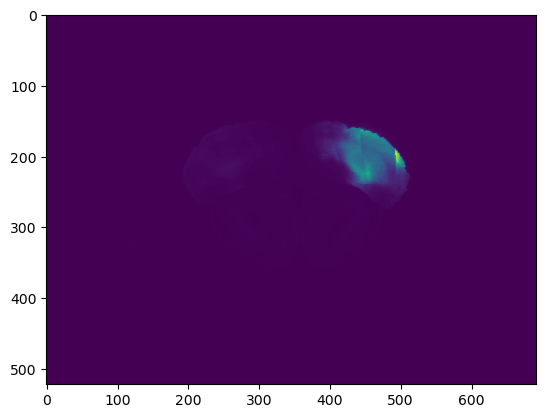

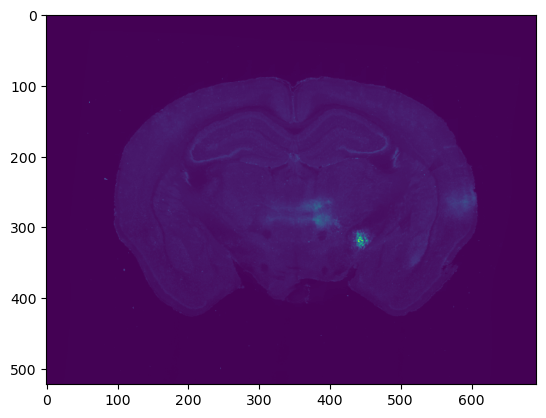

In [14]:
plt.imshow(images[0][25])
plt.show()
plt.imshow(images[0][100])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

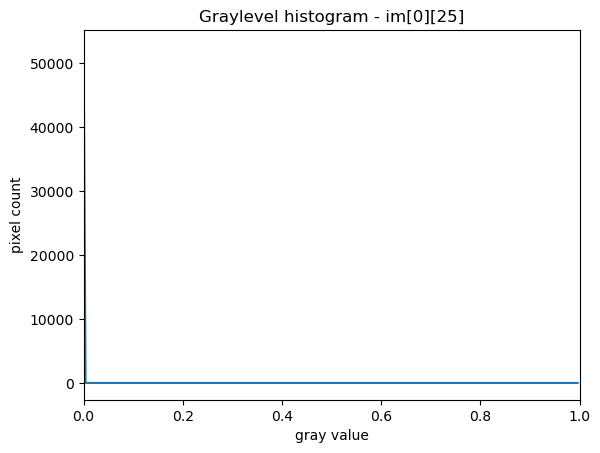

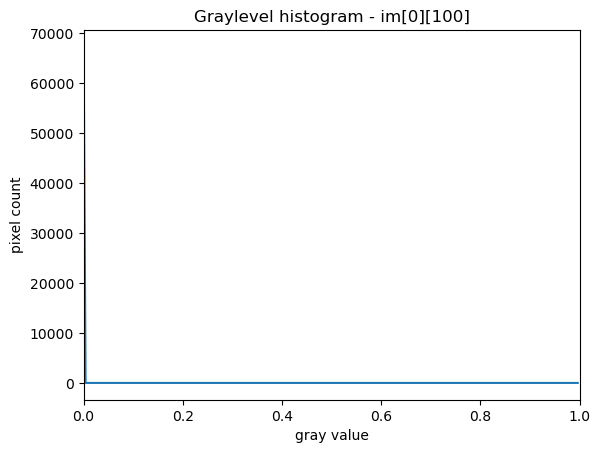

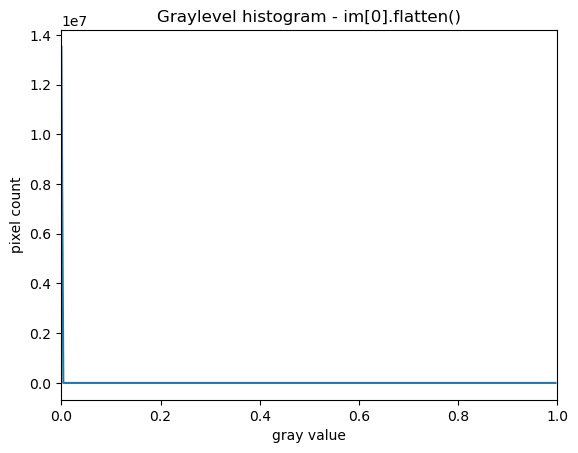

In [16]:
# histograms for raw images

# show the histogram of the raw image
histogram, bin_edges = np.histogram(images[0][25], bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram - im[0][25]")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show

histogram, bin_edges = np.histogram(images[0][100], bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram - im[0][100]")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show

histogram, bin_edges = np.histogram(images[0].flatten(), bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram - im[0].flatten()")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show

In [9]:
# 256 histogram of raw image
images[0].shape

(201, 522, 692)

In [10]:
from scipy.ndimage import gaussian_filter # for applying gaussian filter for density plots
# use sigma=3, based on what used for contour plots

images_blur = [gaussian_filter(im,sigma=3) for im in images]


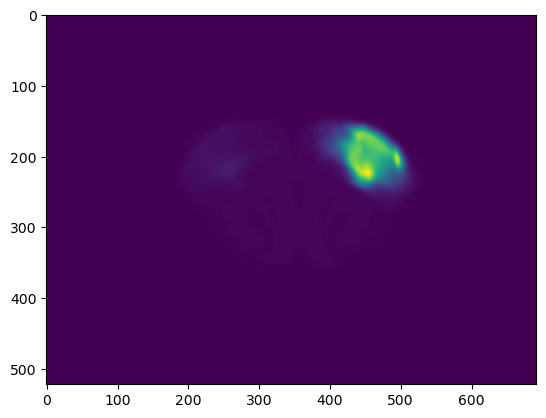

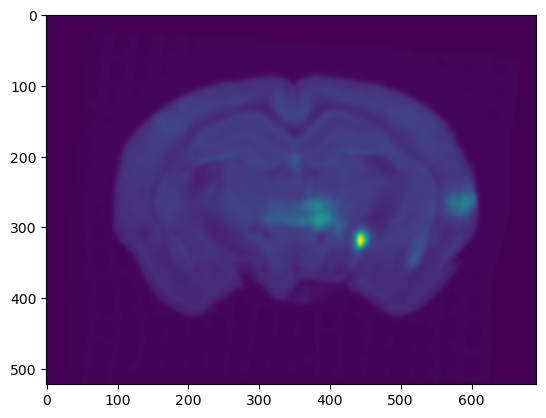

In [13]:
plt.imshow(images_blur[0][25])
plt.show()
plt.imshow(images_blur[0][100])
plt.show()

In [50]:
from scipy.ndimage import median_filter # for applying gaussian filter for density plots

images_med = [median_filter(im) for im in images]
plt.show(images_med[0][25])

RuntimeError: no footprint or filter size provided

: 

In [ ]:
plt.show(images[0][25])

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


NameError: name 'source' is not defined

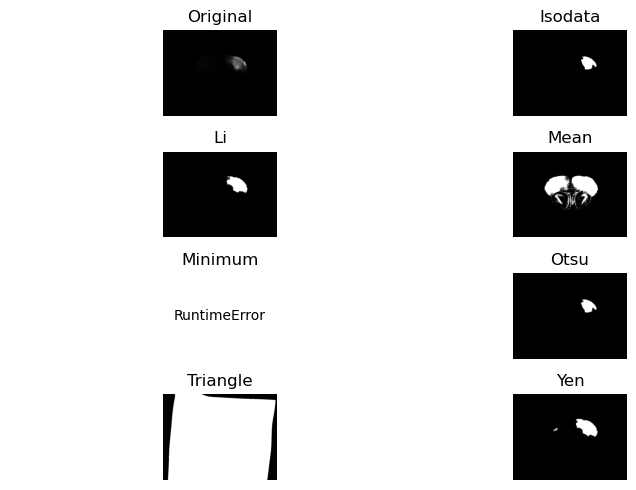

In [17]:
from skimage.filters import try_all_threshold
try_all_threshold(images[0][25], figsize=(8, 5), verbose=True)


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 800x500 with 8 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Isodata'}>,
        <Axes: title={'center': 'Li'}>, <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Minimum'}>,
        <Axes: title={'center': 'Otsu'}>,
        <Axes: title={'center': 'Triangle'}>,
        <Axes: title={'center': 'Yen'}>], dtype=object))

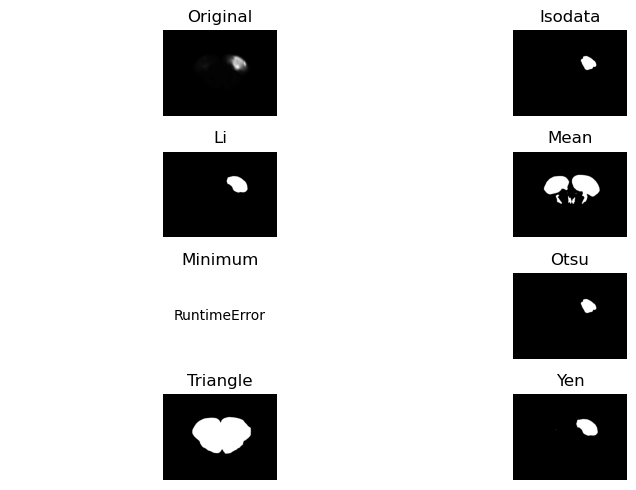

In [18]:
from skimage.filters import try_all_threshold
try_all_threshold(images_blur[0][25], figsize=(8, 5), verbose=True)

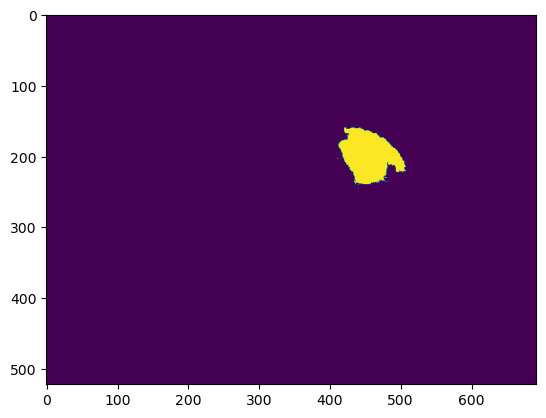

In [24]:
from skimage.filters import threshold_otsu
# get otsu's threshold
test = images[0][25]
thresh = threshold_otsu(test)
binary = test > thresh
plt.imshow(binary)

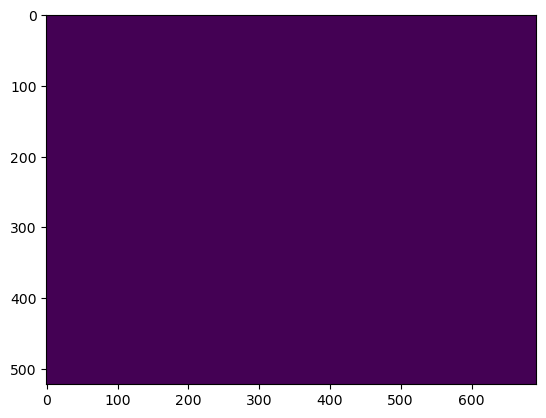

In [41]:
# get otsu's threshold
test = images[0][25]
thresh = threshold_otsu(test)


test3d_mask = images[0] > thresh

# plt.imshow(test3d_mask[50])
test3d_mask[44:] = False
plt.imshow(test3d_mask[50])

In [42]:

viewer = napari.view_image(
        images[0],
        name="raw_image",
        scale=[2.5,1,1],
        opacity=0.75
#         contrast_limits=[[1000, 20000], [1000, 50000]],
        )

viewer.add_image(
        test3d_mask,
        name="inj_thrsh",
        scale=[2.5,1,1],
        colormap="blue",
        blending="additive")

<Image layer 'inj_thrsh' at 0x17bc2df00>

# Quantify integrated fluorescence

In [11]:
test = images[0]


(201, 522, 692)